# Markov Chains

Random Walk : Continous Markov Chain

If $X_t = 0$ and the transition model is given as :

$P[X_{t+1} | X_t = x_t] = N(x_t , 1)$

In [1]:
set.seed(34)

In [2]:
n = 100
x = numeric(n)

In [3]:
for (i in 2:n){
    
    x[i] = rnorm(n = 1, mean = x[i-1], sd = 1)
    
}

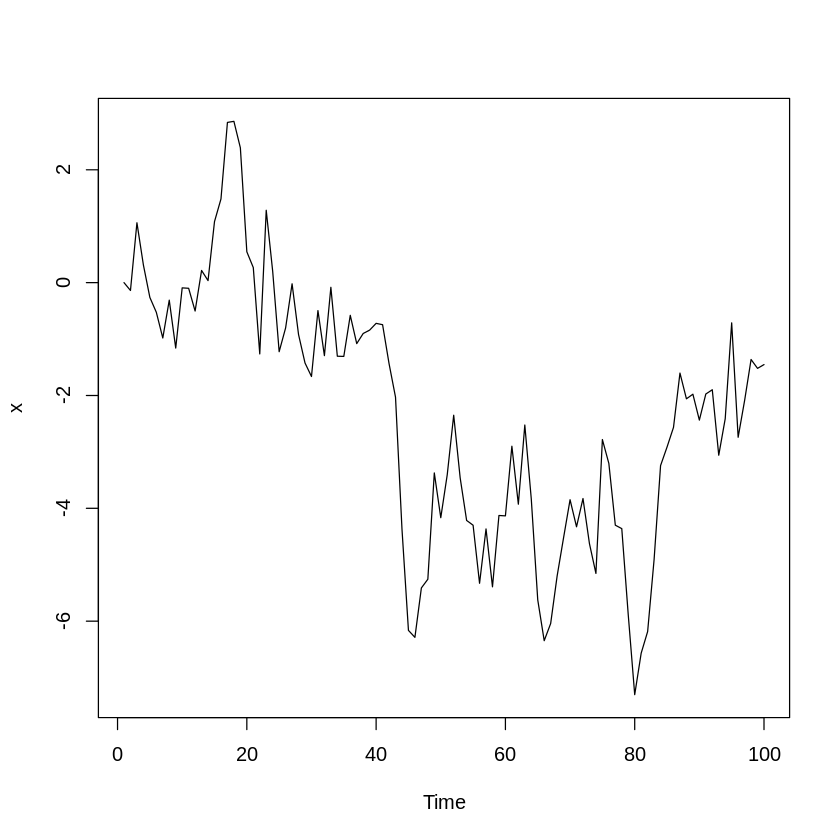

In [4]:
plot.ts(x)

In [5]:
Q = matrix(c(0.0, 0.5, 0.0, 0.0, 0.5,
             0.5, 0.0, 0.5, 0.0, 0.0,
             0.0, 0.5, 0.0, 0.5, 0.0,
             0.0, 0.0, 0.5, 0.0, 0.5,
             0.5, 0.0, 0.0, 0.5, 0.0), 
           nrow=5, byrow=TRUE)

Q2 = (Q %*% Q)

In [6]:
Q2

0.50,0.00,0.25,0.25,0.00
0.00,0.50,0.00,0.25,0.25
0.25,0.00,0.50,0.00,0.25
0.25,0.25,0.00,0.50,0.00
0.00,0.25,0.25,0.00,0.50


In [7]:
Q2[1,3]

[1] 0.25

Stationary Distribution : Long Run Probability in a Markov Chain

The Stationary Distribution of the chain is the initial state distribution for which performing a transition will not change the probability of ening up in any given state.

In [8]:
c(0.2,0.2,0.2,0.2,0.2) %*% Q

0.2,0.2,0.2,0.2,0.2


If you simulate a Markov Chain for a large number of iterations, the samples can be used as a Monte Carlo sample form it's stationary distribution.

This is exactly how we will use Markov Chain for Bayesian Inference. In order to simulate from a compliated posterior distribution, **we will set up and run a Markov Chain whose stationary distribution is the posterior distribution**.

### Stationary Distribution in Continuous Case

Consider transition distribution of the form : $P[X_{t+1} | X_t = x_t] = N(\phi x_t, 1)$ where $-1 \lt \phi \lt 1$

Which means that the probability distribution for the next state is Normal with variance 1 and mean $\phi$ times the current state.

Now, if $-1 \lt \phi \lt 1$, then the stationary distribution will indeed converge.

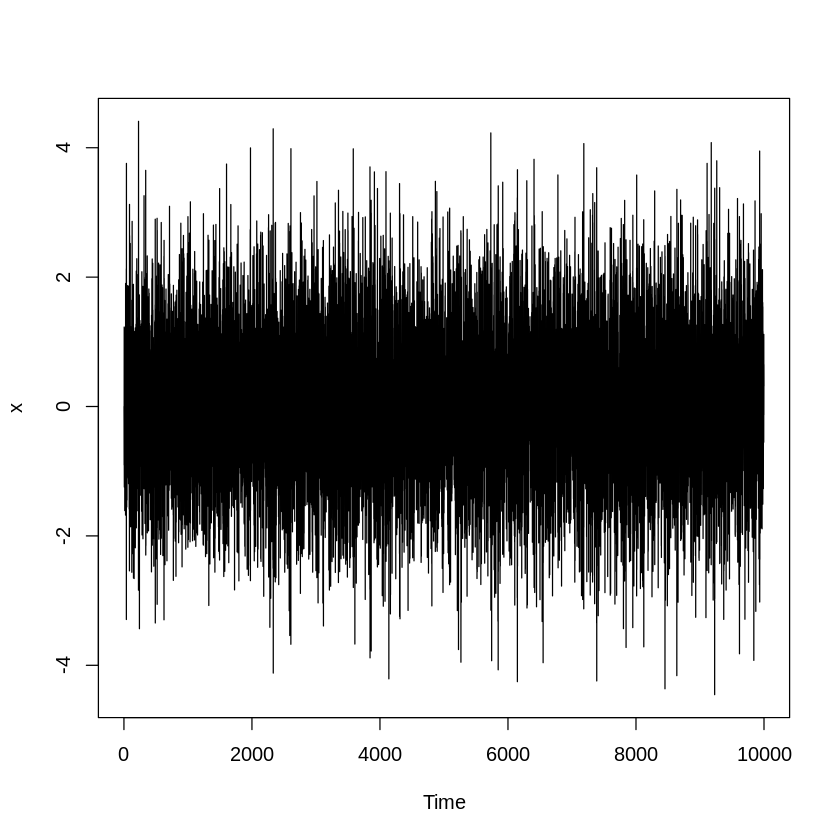

In [11]:
set.seed(38)

n = 10000
x = numeric(n)

phi = -0.6

for (i in 2:n){
    
    x[i] = rnorm(1, phi * x[i-1], 1)
    
}

plot.ts(x)

The theoretical stationary distribution for this chain is normal with mean 0 and variance $\frac{1}{1-\phi^2}$,

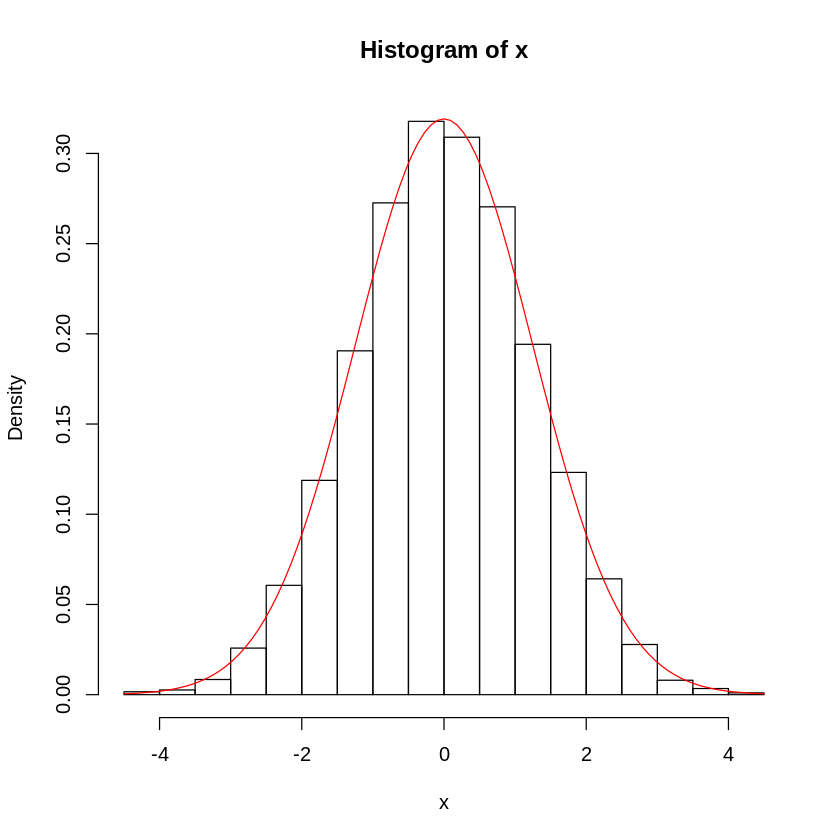

In [12]:
hist(x,freq = FALSE)
curve(dnorm(x,0,sqrt(1/(1-phi^2))), col = 'red', add = TRUE)

It appears that the chain has reached stationary distribution, **thus we can treat the simulation from the chain as Monte Carlo samples from the stationary distribution, which in this case is a Normal Distribution with mean 0 and variance $\frac{1}{1-\phi^2} = 1.562$**

In [13]:
1/(1-phi^2)

[1] 1.5625

So in totality, to draw inferences from complicated posterior distributions, we will generate a Markov Chain whose stationary distribution matches with the Posterior Distribution in the question and then we will just simulate the chain to represent that complicated posterior distribution.